# Statevectors, Quantum Circuits

### Contents
* basic quantum circuit
* qsphere statevector plot
* evolving statevector through hadamard gate
* create and visualize bell state 
* histogram distribution of bell state

In [2]:
%pip install -U -r resources/requirements.txt
from IPython.display import clear_output
clear_output()

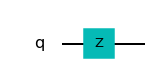

In [4]:
#basic circuit example

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.quantum_info import state_fidelity

zerosv = Statevector.from_label("0")
onesv = Statevector.from_label("1")

mycircuit = QuantumCircuit(1)
mycircuit.z(0)
evolved_zerosv = zerosv.evolve(mycircuit)
# state_fidelity(zerosv, evolved_zerosv) #returns state
mycircuit.draw("mpl")

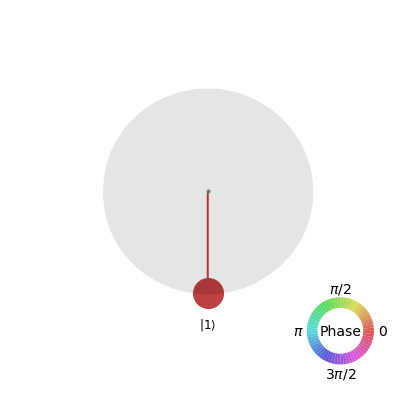

In [5]:
#plot single statevector on qsphere

from qiskit.visualization import plot_state_qsphere
clear_output()

plot_state_qsphere(onesv.data)

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


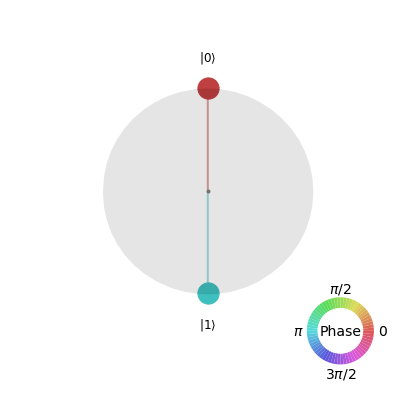

In [6]:
# evolve |1> statevector on hadamard gate circuit

hadcircuit = QuantumCircuit(1)
hadcircuit.h(0)
evolved_onesv = onesv.evolve(hadcircuit)
print(evolved_onesv)

plot_state_qsphere(evolved_onesv.data)
# hadcircuit.draw("mpl")

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


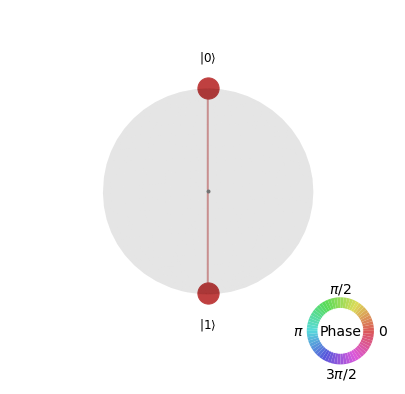

In [8]:
# evolve |0> on hadamard circuit

evolved_zerosv = zerosv.evolve(hadcircuit)
print(evolved_zerosv)
plot_state_qsphere(evolved_zerosv)

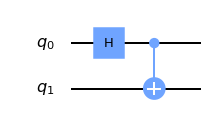

In [11]:
# create bell state setup

bipartitestate = Statevector.from_label("00")
bellcircuit = QuantumCircuit(2)
bellcircuit.h(0)
bellcircuit.cx(0, 1)
bellcircuit.draw("mpl")

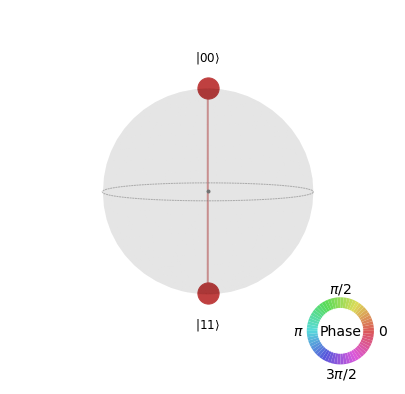

In [13]:
# evolve and visualize bipartite state |00> 

evolved_bistate = bipartitestate.evolve(bellcircuit)
plot_state_qsphere(evolved_bistate)

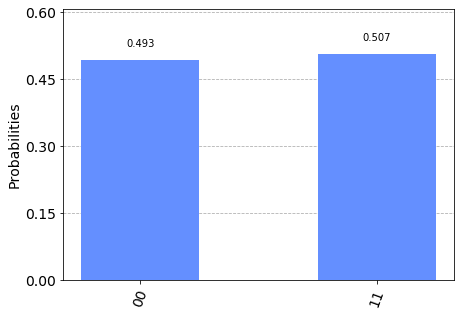

In [14]:
# plot bell state histogram to visualize distribution

from qiskit.visualization import plot_histogram

counts = evolved_bistate.sample_counts(shots=1000)
plot_histogram(counts)